In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

os.chdir("..")

In [16]:
ds = {
    "era5": xr.open_dataset("data/clean/ERA5_tmp.nc"),
    "fcti": xr.open_dataset("data/clean/fcti.nc"),
    "giems": xr.open_dataset("data/clean/GIEMS-MC_fwet.nc"),
    "gleam": xr.open_dataset("data/clean/GLEAM4a_sm.nc"),
    "grace": xr.open_dataset("data/clean/GRACE_lwe_thickness.nc"),
    "mswep": xr.open_dataset("data/clean/MSWEP_pre.nc"),
    "mask": xr.open_dataset("data/wetland_mask.nc"),
    "pixel_area": xr.open_dataset("data/clean/PixelArea_area.nc"),
}

In [17]:
for k, v in ds.items():
    print(f"{k}: {v}")

era5: <xarray.Dataset> Size: 2GB
Dimensions:  (time: 540, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1980-01-01 1980-02-01 ... 2024-12-01
  * lat      (lat) float64 6kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    tmp      (time, lat, lon) float32 2GB ...
fcti: <xarray.Dataset> Size: 8MB
Dimensions:  (lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float64 6kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    fcti     (lat, lon) float64 8MB ...
Attributes:
    source:   Generated by BogangDong
giems: <xarray.Dataset> Size: 3GB
Dimensions:  (time: 348, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 3kB 1992-01-01 1992-02-01 ... 2020-12-01
  * lat      (lat) float64 6kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) fl

In [ ]:
# flip gleam latitude
gleam = ds["gleam"]
gleam = gleam.reindex(lat=gleam.lat[::-1])
gleam

<xarray.Dataset> Size: 2GB
Dimensions:  (lat: 720, lon: 1440, time: 540)
Coordinates:
  * lat      (lat) float64 6kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 4kB 1980-01-01 1980-02-01 ... 2024-12-01
Data variables:
    sm       (time, lat, lon) float32 2GB ...
Attributes:
    Dataset:      Global Land Evaporation Amsterdam Model
    Version:      4.2a
    Authors:      Hydro-Climate Extremes Lab (H-CEL)
    Institution:  Ghent University
    Contact:      info@gleam.eu
    Reference1:   Miralles, D.G. et al. 2011: Global land-surface evaporation...
    Reference2:   Miralles, D. G., Bonte, O., Koppa, A., Villanueva, O. B., T...

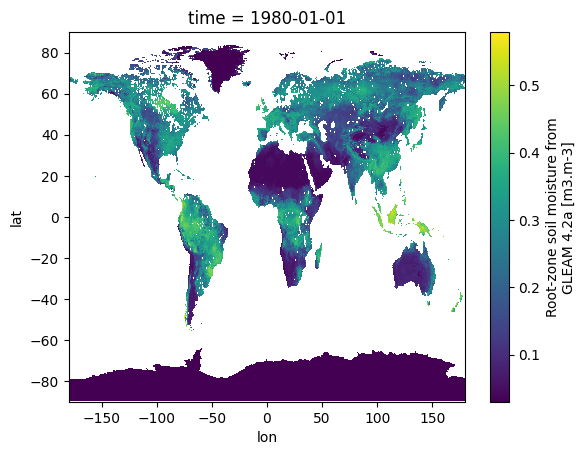

In [7]:
gleam.isel(time=0).sm.plot()

In [9]:
gleam.to_netcdf("data/clean/GLEAM4a_sm2.nc", mode="w")